In [2]:
import pandas as pd
df = pd.read_csv('Aviation_Data.csv', low_memory=False)
dp = pd.read_csv('faa_incidents_data.csv', low_memory=False)

In [4]:
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [5]:
df.isnull().sum()

Event.Id                   1459
Investigation.Type            0
Accident.Number            1459
Event.Date                 1459
Location                   1511
Country                    1685
Latitude                  55966
Longitude                 55975
Airport.Code              40216
Airport.Name              37644
Injury.Severity            2459
Aircraft.damage            4653
Aircraft.Category         58061
Registration.Number        2841
Make                       1522
Model                      1551
Amateur.Built              1561
Number.of.Engines          7543
Engine.Type                8555
FAR.Description           58325
Schedule                  77766
Purpose.of.flight          7651
Air.carrier               73700
Total.Fatal.Injuries      12860
Total.Serious.Injuries    13969
Total.Minor.Injuries      13392
Total.Uninjured            7371
Weather.Condition          5951
Broad.phase.of.flight     28624
Report.Status              7843
Publication.Date          16689
dtype: i

In [6]:
df.notna().sum()

Event.Id                  88889
Investigation.Type        90348
Accident.Number           88889
Event.Date                88889
Location                  88837
Country                   88663
Latitude                  34382
Longitude                 34373
Airport.Code              50132
Airport.Name              52704
Injury.Severity           87889
Aircraft.damage           85695
Aircraft.Category         32287
Registration.Number       87507
Make                      88826
Model                     88797
Amateur.Built             88787
Number.of.Engines         82805
Engine.Type               81793
FAR.Description           32023
Schedule                  12582
Purpose.of.flight         82697
Air.carrier               16648
Total.Fatal.Injuries      77488
Total.Serious.Injuries    76379
Total.Minor.Injuries      76956
Total.Uninjured           82977
Weather.Condition         84397
Broad.phase.of.flight     61724
Report.Status             82505
Publication.Date          73659
dtype: i

THREE INSIGHTS:
-----AIRCRAFT WITH LOWEST ACCIDENT SEVERITY RATES -- (alr)
-----OPERATIONAL SAFETY STRATEGY OF AIRCRAFTS - MOST AND LEAST ACCIDENTS IN SPECIFIC WEATHER- PATTERN BTWN ACCIDENTS AND AIRCRAFT
-----PURPOSE OF FLIGHT - CARGO , PERSONAL ETC

In [7]:
##AIRCRAFT WITH LOWEST ACCIDENT SEVERITY RATES
low_accident_rate = ['Make', 'Model', 'Engine.Type', 'Number.of.Engines',
 'Injury.Severity', 'Aircraft.damage', 
 'Investigation.Type', 'Aircraft.Category','Total.Fatal.Injuries', 'Total.Serious.Injuries',
    'Total.Minor.Injuries', 'Total.Uninjured', 'Report.Status']
low_accident_rates = df[low_accident_rate]

In [8]:
len(dp)

100000

In [9]:
df['Investigation.Type'].value_counts()

Investigation.Type
Accident      85015
Incident       3874
25-09-2020      702
26-09-2020       60
02-02-2021       39
              ...  
13-09-2021        1
04-08-2021        1
05-08-2022        1
03-11-2020        1
06-01-2021        1
Name: count, Length: 71, dtype: int64

In [10]:
low_accident_rates.head()

,Make,Model,Engine.Type,Number.of.Engines,Injury.Severity,Aircraft.damage,Investigation.Type,Aircraft.Category,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Report.Status
0,Stinson,108-3,Reciprocating,1.0,Fatal(2),Destroyed,Accident,NaN,2.0,0.0,0.0,0.0,Probable Cause
1,Piper,PA24-180,Reciprocating,1.0,Fatal(4),Destroyed,Accident,NaN,4.0,0.0,0.0,0.0,Probable Cause
2,Cessna,172M,Reciprocating,1.0,Fatal(3),Destroyed,Accident,NaN,3.0,NaN,NaN,NaN,Probable Cause
3,Rockwell,112,Reciprocating,1.0,Fatal(2),Destroyed,Accident,NaN,2.0,0.0,0.0,0.0,Probable Cause
4,Cessna,501,NaN,NaN,Fatal(1),Destroyed,Accident,NaN,1.0,2.0,NaN,0.0,Probable Cause


In [11]:
##PURPOSE OF FLIGHT RISKS
purpose_of_flight = ['Purpose.of.flight', 'Schedule', 'Investigation.Type']
purpose_of_flight_risk = df[purpose_of_flight]

In [12]:
purpose_of_flight_risk.head()

,Purpose.of.flight,Schedule,Investigation.Type
0,Personal,NaN,Accident
1,Personal,NaN,Accident
2,Personal,NaN,Accident
3,Personal,NaN,Accident
4,Personal,NaN,Accident


In [13]:
##OPERATIONAL SAFETY STRATEGY OF AIRCRAFTS
weather_flight_phase = ['Weather.Condition', 'Broad.phase.of.flight', 'Location', 'Country']
weather_flight_phase_risk = df[weather_flight_phase]


In [14]:
weather_flight_phase_risk.head()

,Weather.Condition,Broad.phase.of.flight,Location,Country
0,UNK,Cruise,"MOOSE CREEK, ID",United States
1,UNK,Unknown,"BRIDGEPORT, CA",United States
2,IMC,Cruise,"Saltville, VA",United States
3,IMC,Cruise,"EUREKA, CA",United States
4,VMC,Approach,"Canton, OH",United States


ANALYSIS OF LOW ACCIDENT RATES COLUMNS 

In [15]:
##Determine unique values in report status which shows us stage of investigation
df['Report.Status'].value_counts(dropna=False)

Report.Status
Probable Cause                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        61754
NaN                                                                                                                                                                                                                                                                                           

In [16]:
##percentage of null values in injury severity
to = len(df['Injury.Severity'])
print((df['Injury.Severity'].isnull().sum() / to)*100)
print(to)


2.7216983220436535
90348


In [17]:
df['Injury.Severity'].value_counts(dropna=False)

Injury.Severity
Non-Fatal     67357
Fatal(1)       6167
Fatal          5262
Fatal(2)       3711
NaN            2459
              ...  
Fatal(80)         1
Fatal(217)        1
Fatal(169)        1
Fatal(88)         1
Fatal(189)        1
Name: count, Length: 110, dtype: int64

In [18]:
##percentage of null values in aircraft damage
tl = len(df['Aircraft.damage'])
print((df['Aircraft.damage'].isnull().sum() / tl)*100)
print(tl)


5.150086332846328
90348


In [19]:
df['Aircraft.damage'].value_counts(dropna=False)

Aircraft.damage
Substantial    64148
Destroyed      18623
NaN             4653
Minor           2805
Unknown          119
Name: count, dtype: int64

In [20]:
##percentage of null values in aircaft category
tt = len(df['Aircraft.Category'])
print((df['Aircraft.Category'].isnull().sum() / tt)*100)
print(tt)


64.26373577721698
90348


In [21]:
df['Aircraft.Category'].value_counts(dropna=False)
df['Engine.Type'].value_counts(dropna=False)

Engine.Type
Reciprocating      69530
NaN                 8555
Turbo Shaft         3609
Turbo Prop          3391
Turbo Fan           2481
Unknown             2051
Turbo Jet            703
Geared Turbofan       12
Electric              10
LR                     2
NONE                   2
Hybrid Rocket          1
UNK                    1
Name: count, dtype: int64

In [22]:
##we need these columns in order to infer aircraft category. we filter and keep null values to work with
fill_null_air_cat = df[['Make', 'Model', 'Engine.Type', 'Number.of.Engines', 'Aircraft.Category']]

fill_null_air_cat = fill_null_air_cat[fill_null_air_cat['Aircraft.Category'].isna()]
fill_null_air_cat

,Make,Model,Engine.Type,Number.of.Engines,Aircraft.Category
0,Stinson,108-3,Reciprocating,1.0,NaN
1,Piper,PA24-180,Reciprocating,1.0,NaN
2,Cessna,172M,Reciprocating,1.0,NaN
3,Rockwell,112,Reciprocating,1.0,NaN
4,Cessna,501,NaN,NaN,NaN
...,...,...,...,...,...
90342,AIR TRACTOR,AT502,NaN,NaN,NaN
90343,PIPER,PA-28-151,NaN,NaN,NaN
90344,BELLANCA,7ECA,NaN,NaN,NaN
90346,CESSNA,210N,NaN,NaN,NaN


In [23]:
#cant deduce aircraft category without both enginetype and number of engines hnce need to drop missing values in those 2 columns
can_fill_air_cat = fill_null_air_cat.dropna(subset=['Engine.Type', 'Number.of.Engines'])

In [24]:
#cant deduce aircraft category without both enginetype and number of engines hnce need to drop missing values in those 2 columns
can_fill_air_cat = fill_null_air_cat.dropna(subset=['Engine.Type', 'Number.of.Engines'])
fill_groups = can_fill_air_cat.groupby('Make')## Grouping aircrafts accordingto their make
fill_groups_df = fill_groups.apply(lambda x:x)
fill_groups_df.to_csv("aircraft groups per make")

#print(fill_groups.groups)
#can_fill_air_cat.to_csv("filling null aircraft category")

In [25]:
# Lowercase and strip spaces for consistency
df['Engine.Type'] = df['Engine.Type'].astype(str).str.lower().str.strip()

# Create confidence column
df['Category.Confidence'] = 'Low'

# Mapping engine type → category
engine_to_category = {
    'reciprocating': 'Airplane',
    'turbo shaft': 'Helicopter',
    'turboshaft': 'Helicopter',
    'turbo prop': 'Airplane',
    'turboprop': 'Airplane',
    'turbo fan': 'Airplane',
    'turbofan': 'Airplane',
    'turbo jet': 'Airplane',
    'turbojet': 'Airplane',
    'geared turbofan': 'Airplane',
    'electric': 'Airplane',
    'hybrid rocket': 'Rocket'
}


# Apply rules
for key, value in engine_to_category.items():
    mask = df['Engine.Type'].str.contains(key, na=False)
    df.loc[mask & df['Aircraft.Category'].isna(), 'Aircraft.Category'] = value
    df.loc[mask, 'Category.Confidence'] = 'High'

# Mark clearly unknown cases
unknown_mask = df['Engine.Type'].str.contains('unknown|unk|none|lr', na=False)
df.loc[unknown_mask & df['Aircraft.Category'].isna(), 'Aircraft.Category'] = 'Unknown'
df.loc[unknown_mask, 'Category.Confidence'] = 'Low'

In [26]:
new_air_cat = df[['Make', 'Model', 'Engine.Type', 'Number.of.Engines', 'Aircraft.Category']]
new_air_cat

,Make,Model,Engine.Type,Number.of.Engines,Aircraft.Category
0,Stinson,108-3,reciprocating,1.0,Airplane
1,Piper,PA24-180,reciprocating,1.0,Airplane
2,Cessna,172M,reciprocating,1.0,Airplane
3,Rockwell,112,reciprocating,1.0,Airplane
4,Cessna,501,nan,NaN,NaN
...,...,...,...,...,...
90343,PIPER,PA-28-151,nan,NaN,NaN
90344,BELLANCA,7ECA,nan,NaN,NaN
90345,AMERICAN CHAMPION AIRCRAFT,8GCBC,nan,1.0,Airplane
90346,CESSNA,210N,nan,NaN,NaN


In [27]:
#null aircraft categories that will be dropped
missing_df = df[df['Aircraft.Category'].isna()]

missing_df['Make'].value_counts().head(30)

Make
Cessna                  215
Boeing                  177
BOEING                  106
Piper                    99
Bell                     52
CESSNA                   52
Robinson                 49
Beech                    46
Schweizer                33
PIPER                    32
Mcdonnell Douglas        26
Airbus Industrie         23
BEECH                    21
Schleicher               20
Aerostar                 16
ROBINSON                 15
Burkhart Grob            13
Let                      13
Hughes                   11
AIRBUS                   11
Schempp-hirth            11
Sikorsky                 10
BELL                     10
Cameron Balloons          9
SIKORSKY                  7
AIR TRACTOR               7
Airbus                    7
British Aerospace         7
DE HAVILLAND              6
Gulfstream Aerospace      6
Name: count, dtype: int64

#Aircraft Category was missing in 38% of records. Engine type rules filled ~95% with high confidence. Remaining low-information rows were labeled as Unknown

In [59]:
df_cleaned = df.dropna(subset=['Aircraft.Category']).copy()
df_cleaned['Aircraft.Category'].isna().sum()

0

##git push 


In [31]:
total_casualties = (
    df['Total.Fatal.Injuries'].fillna(0) + ##fill null values with 0 to avoid getting NaN during addition
    df['Total.Serious.Injuries'].fillna(0) +
    df['Total.Minor.Injuries'].fillna(0) +
    df['Total.Uninjured'].fillna(0)
)
df['Total.Casualties'] = total_casualties
aircraft_accident_rates =df[['Aircraft.Category','Injury.Severity','Aircraft.damage', 'Total.Casualties']]
aircraft_accident_rates

,Aircraft.Category,Injury.Severity,Aircraft.damage,Total.Casualties
0,Airplane,Fatal(2),Destroyed,2.0
1,Airplane,Fatal(4),Destroyed,4.0
2,Airplane,Fatal(3),Destroyed,3.0
3,Airplane,Fatal(2),Destroyed,2.0
4,NaN,Fatal(1),Destroyed,3.0
...,...,...,...,...
90343,NaN,Minor,NaN,1.0
90344,NaN,NaN,NaN,0.0
90345,Airplane,Non-Fatal,Substantial,1.0
90346,NaN,NaN,NaN,0.0


In [32]:
#evaluating total casualties 
total_casualty_csv = df['Total.Casualties'].to_csv('Casualties', index=False)
df['Total.Casualties'].unique()
df['Total.Casualties'].value_counts().sort_index()
df['Total.Casualties'].describe()

count    90348.000000
mean         5.987349
std         27.630006
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max        699.000000
Name: Total.Casualties, dtype: float64

In [33]:
## evaluating all casualties per category
df['HasCasualties'] = df['Total.Casualties'] > 0
casualties_percentage = df.groupby('Aircraft.Category')['HasCasualties'].mean() * 100


#max_casualties
#avg_casualties 
#accidents_by_category

helicopters_airplanes_casualties_percentage = casualties_percentage.loc[['Helicopter', 'Airplane']]
helicopters_airplanes_casualties_percentage


Aircraft.Category
Helicopter    98.723107
Airplane      98.806752
Name: HasCasualties, dtype: float64

In [34]:
##evaluate categories with severe and fatal injuries
df['HasSevereCasualty'] = df['Total.Serious.Injuries'] + df['Total.Fatal.Injuries'] > 0
severe_casualties_percentage = df.groupby('Aircraft.Category')['HasSevereCasualty'].mean() * 100
severe_casualties_percentage
helicopters_airplanes_severe_casualties_percentage = severe_casualties_percentage.loc[['Helicopter', 'Airplane']]
helicopters_airplanes_severe_casualties_percentage

Aircraft.Category
Helicopter    34.773483
Airplane      26.985460
Name: HasSevereCasualty, dtype: float64

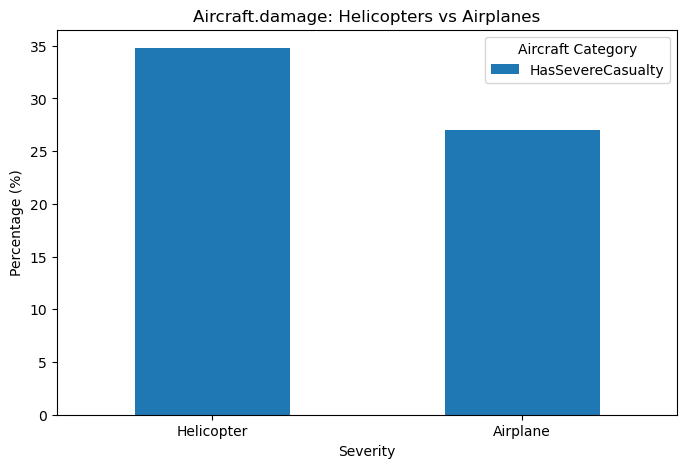

In [35]:
##plotting severe and fatal injuries in helicopters and airplanes
import matplotlib.pyplot as plt

helicopters_airplanes_severe_casualties_percentage.T.plot(kind='bar', figsize=(8,5))
plt.title('Aircraft.damage: Helicopters vs Airplanes')
plt.ylabel('Percentage (%)')
plt.xlabel('Severity')
plt.xticks(rotation=0)
plt.legend(title='Aircraft Category')
plt.show()

In [36]:
damage_dist = aircraft_accident_rates.groupby(['Aircraft.Category', 'Aircraft.damage']).size().unstack(fill_value=0)
damage_dist_percentage = aircraft_accident_rates.groupby(['Aircraft.Category', 'Aircraft.damage']).size().groupby(level=0).apply(lambda x: (x /x.sum())*100).unstack(fill_value=0)
damage_dist_percentage 
helicopters_airplanes_damage_dist = damage_dist_percentage.loc[['Helicopter', 'Airplane']]
helicopters_airplanes_damage_dist

,Aircraft.damage,Destroyed,Minor,Substantial,Unknown
Aircraft.Category,Aircraft.Category,,,,
Helicopter,Helicopter,22.098854,1.987822,75.644699,0.268625
Airplane,Airplane,21.430351,3.121599,75.316945,0.131105


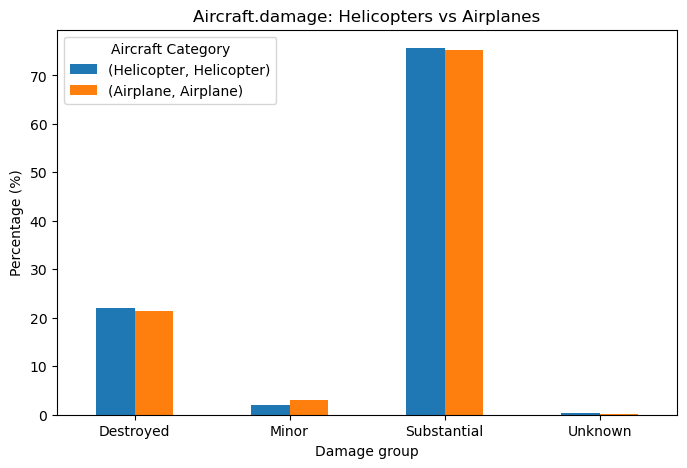

In [37]:
import matplotlib.pyplot as plt

helicopters_airplanes_damage_dist.T.plot(kind='bar', figsize=(8,5))
plt.title('Aircraft.damage: Helicopters vs Airplanes')
plt.ylabel('Percentage (%)')
plt.xlabel('Damage group')
plt.xticks(rotation=0)
plt.legend(title='Aircraft Category')
plt.show()

In [38]:
##injury severity is has too many categories hence th need to group them into smaller workable categories
def simplify_injury(severity):
    if isinstance(severity, str) and severity.startswith('Fatal'):
        return 'Fatal'
    elif severity == 'Non-Fatal':
        return 'Non-Fatal'
    elif severity == 'Incident':
        return 'Incident'
    else:
        return 'Unknown'

aircraft_accident_rates['Severity_Group'] = aircraft_accident_rates['Injury.Severity'].apply(simplify_injury)

/var/folders/22/sgmzcv3j7nz5t7bc1byt1xlh0000gn/T/ipykernel_2051/2246967814.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aircraft_accident_rates['Severity_Group'] = aircraft_accident_rates['Injury.Severity'].apply(simplify_injury)


In [39]:
#shows percentages and converts helicopters and airplanes into 2 categories
severity_group_counts = aircraft_accident_rates.groupby(['Aircraft.Category', 'Severity_Group']).size().unstack(fill_value=0)
severity_group_percentage = aircraft_accident_rates.groupby(['Aircraft.Category', 'Severity_Group']).size() \
    .groupby(level=0).apply(lambda x: (x / x.sum())*100).unstack(fill_value=0)

# Filter for Helicopters and Airplanes
severity_dist_helicopters_airplanes = severity_group_percentage.loc[['Helicopter', 'Airplane']]
severity_dist_helicopters_airplanes

,Severity_Group,Fatal,Incident,Non-Fatal,Unknown
Aircraft.Category,Aircraft.Category,,,,
Helicopter,Helicopter,22.599265,1.311877,73.867413,2.221445
Airplane,Airplane,19.511761,2.377590,76.664250,1.446399


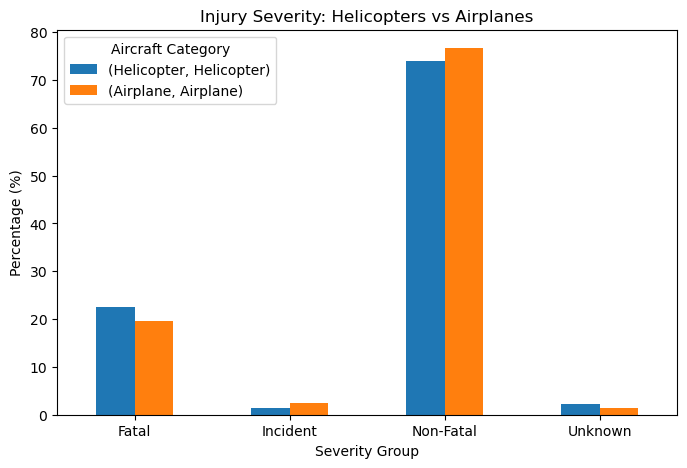

In [40]:
##plotting percentages of injury severity per group
import matplotlib.pyplot as plt

severity_dist_helicopters_airplanes.T.plot(kind='bar', figsize=(8,5))
plt.title('Injury Severity: Helicopters vs Airplanes')
plt.ylabel('Percentage (%)')
plt.xlabel('Severity Group')
plt.xticks(rotation=0)
plt.legend(title='Aircraft Category')
plt.show()

In [41]:

flight_purpose = ['Purpose.of.flight', 'Schedule', 'Investigation.Type']
flight_purpose = df[flight_purpose]
flight_purpose.head()

flight_purpose.groupby('Purpose.of.flight')

In [42]:
commercial_categories = [
    'Business', 'Executive/corporate', 'Aerial Application', 'Aerial Observation',
    'Public Aircraft', 'Public Aircraft - Federal', 'Public Aircraft - State',
    'Public Aircraft - Local', 'Other Work Use', 'Positioning', 'Ferry',
    'External Load', 'Firefighting', 'Banner Tow', 'Skydiving', 'Glider Tow',
    'Air Race/show', 'Air Race show', 'Flight Test', 'Air Drop',
    'PUBS', 'PUBL', 'ASHO'
]

private_categories = [
    'Personal', 'Instructional'
]

# Create new classification column
flight_purpose['Flight.Use.Type'] = flight_purpose['Purpose.of.flight'].apply(
    lambda x: 'Commercial' if x in commercial_categories
    else 'Private' if x in private_categories
    else 'Unknown'
)

/var/folders/22/sgmzcv3j7nz5t7bc1byt1xlh0000gn/T/ipykernel_2051/547504060.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flight_purpose['Flight.Use.Type'] = flight_purpose['Purpose.of.flight'].apply(


In [43]:
flight_purpose['Flight.Use.Type'].value_counts()

Flight.Use.Type
Private       60049
Commercial    15846
Unknown       14453
Name: count, dtype: int64

In [44]:
flight_investigations = pd.crosstab(flight_purpose['Flight.Use.Type'], flight_purpose['Investigation.Type'])
print(flight_investigations)

Investigation.Type  01-06-2021  01-07-2022  01-09-2022  01-11-2022  \
Flight.Use.Type                                                      
Commercial                   0           0           0           0   
Private                      0           0           0           0   
Unknown                      7          14          10          14   

Investigation.Type  02-02-2021  02-12-2022  03-06-2021  03-11-2020  \
Flight.Use.Type                                                      
Commercial                   0           0           0           0   
Private                      0           0           0           0   
Unknown                     39           8           2           1   

Investigation.Type  03-11-2022  03-12-2020  ...  26-08-2021  26-09-2020  \
Flight.Use.Type                             ...                           
Commercial                   0           0  ...           0           0   
Private                      0           0  ...           0           0  

In [45]:
# Keep only Accident and Incident columns
flight_investigations_clean = flight_investigations[['Accident', 'Incident']]
print(flight_investigations_clean)

Investigation.Type  Accident  Incident
Flight.Use.Type                       
Commercial             15489       357
Private                59656       393
Unknown                 9870      3124


In [46]:
# calculate row totals
row_totals = flight_investigations_clean.sum(axis=1)

# calculate percentages within each flight type
percent_within_type = flight_investigations_clean.div(row_totals, axis=0) * 100

print(percent_within_type)
#ca

Investigation.Type   Accident   Incident
Flight.Use.Type                         
Commercial          97.747066   2.252934
Private             99.345534   0.654466
Unknown             75.958135  24.041865


In [47]:
# Total accidents across all flight types
total_accidents = flight_investigations_clean['Accident'].sum()

# percentage of total accidents by flight type
percent_of_total_accidents = (flight_investigations_clean['Accident'] / total_accidents) * 100

print(percent_of_total_accidents)

Flight.Use.Type
Commercial    18.219138
Private       70.171146
Unknown       11.609716
Name: Accident, dtype: float64


In [48]:
flight_purpose['Schedule.Type'] = flight_purpose['Schedule'].apply(
    lambda x: 'Scheduled' if x == 'SCHD' 
    else 'Non-Scheduled' if x == 'NSCH'
    else 'Unknown'
)

/var/folders/22/sgmzcv3j7nz5t7bc1byt1xlh0000gn/T/ipykernel_2051/608664581.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flight_purpose['Schedule.Type'] = flight_purpose['Schedule'].apply(


In [49]:
flight_purpose['Schedule.Type'].value_counts()

##Most of the flights don’t have schedule information recorded (Unknown = 81,865).

Schedule.Type
Unknown          81865
Non-Scheduled     4474
Scheduled         4009
Name: count, dtype: int64

Weather conditions
VMC - Good visual conditions
IMC - Instrument-only conditions (poor visibility)
UNK -  not recorded




In [50]:
weather_flight_phase = ['Aircraft.Category','Weather.Condition', 'Broad.phase.of.flight']
weather_flight_phase = df[weather_flight_phase]
weather_flight_phase_categories = weather_flight_phase.groupby('Aircraft.Category')

filtered_df = weather_flight_phase[weather_flight_phase['Aircraft.Category'].isin(['Airplane', 'Helicopter'])]


df['Weather.Condition'] = df['Weather.Condition'].str.upper()  # Converts 'Unk' -> 'UNK'
df['Weather.Condition'] = df['Weather.Condition'].fillna('UNKNOWN')

#Use crosstab to get counts of weather conditions for each aircraft category - counts occurences of categorical variables
weather_counts_table = pd.crosstab(filtered_df['Aircraft.Category'], filtered_df['Weather.Condition'])

print(weather_counts_table)

Weather.Condition   IMC  UNK  Unk    VMC
Aircraft.Category                       
Airplane           5519  663  222  69078
Helicopter          279   42   37   4790


In [51]:
#accidents per weather conditions percentages
weather_counts_table = pd.DataFrame({
    'IMC': [1409, 113],
    'UNK': [386, 49],
    'UNKNOWN': [3053, 563],
    'VMC': [22769, 2715]
}, index=['Airplane', 'Helicopter'])

weather_counts_percent = weather_counts_table.div(weather_counts_table.sum(axis=1), axis=0) * 100

print(weather_counts_percent)

                 IMC       UNK    UNKNOWN        VMC
Airplane    5.101930  1.397690  11.054785  82.445595
Helicopter  3.284884  1.424419  16.366279  78.924419


In [ ]:
accidents_phase = df['Broad.phase.of.flight', ]

array(['Cruise', 'Unknown', 'Approach', 'Climb', 'Takeoff', 'Landing',
       'Taxi', 'Descent', 'Maneuvering', 'Standing', 'Go-around', 'Other',
       nan], dtype=object)

In [54]:
dp.columns

Index(['AIDS Report Number', 'Local Event Date', 'Event City', 'Event State',
       'Event Airport', 'Event Type', 'Aircraft Damage', 'Flight Phase',
       'Aircraft Make', 'Aircraft Model', 'Aircraft Series', 'Operator',
       'Primary Flight Type', 'Flight Conduct Code', 'Flight Plan Filed Code',
       'Aircraft Registration Nbr', 'Total Fatalities', 'Total Injuries',
       'Aircraft Engine Make', 'Aircraft Engine Model', 'Engine Group Code',
       'Nbr of Engines', 'PIC Certificate Type', 'PIC Flight Time Total Hrs',
       'PIC Flight Time Total Make-Model', ' ', ' .1'],
      dtype='object')